In [10]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import os

np.random.seed(1)
torch.manual_seed(1)


# loss function
def L(ab):
    a = ab[0]
    b = ab[1]
    return (a*b-1)**2

def grad(ab):
    a = ab[0]
    b = ab[1]
    return np.array([2*(a*b-1)*b, 2*(a*b-1)*a])

In [11]:
import copy

# reimplementing adam

epochs = 10000
log = 1000
switch_epoch = 10**10
lr = 1e-1
beta_1 = 0.9
beta_2 = 0.99
eps = 1e-8
a = -1.0
b = 2.0
ab = np.array([a,b])
m = np.array([0,0])
v = np.array([0,0])
ms = []
vs = []
eff_lr = []
gs = []
params = []
#optimizer = optim.Adam(t.parameters(), lr=lr, eps=1e-8, betas=(0.9,0.95))

losses = []
parameters = []

for epoch in range(epochs):

    if (epoch+1) % switch_epoch == 0:
        for opt_param in optimizer.param_groups:
            lr = lr * 0.5
            opt_param['lr'] = lr

    g = grad(ab)
    m = beta_1 * m + (1 - beta_1) * g
    v = beta_2 * v + (1 - beta_2) * (g**2)
    m_hat = m / (1 - beta_1**(epoch+1))
    v_hat = v / (1 - beta_2**(epoch+1))
    ab = ab - lr * m_hat / (np.sqrt(v_hat) + eps)
    loss = L(ab)
    params.append(copy.deepcopy(ab))
    losses.append(copy.deepcopy(loss))
    ms.append(copy.deepcopy(m))
    vs.append(copy.deepcopy(v))
    eff_lr.append(copy.deepcopy(m_hat / (np.sqrt(v_hat) + eps)))
    gs.append(copy.deepcopy(g**2))

    if epoch%log == 0:
        print('Epoch:  %d | loss: %.12f ' %(epoch, loss))
        
params = np.array(params)
ms = np.array(ms)
vs = np.array(vs)
eff_lr = np.array(eff_lr)
gs = np.array(gs)

Epoch:  0 | loss: 7.344100001671 
Epoch:  1000 | loss: 0.001928884315 
Epoch:  2000 | loss: 0.000001353838 
Epoch:  3000 | loss: 0.000001271719 
Epoch:  4000 | loss: 0.000009379764 
Epoch:  5000 | loss: 0.000000000030 
Epoch:  6000 | loss: 0.000025802751 
Epoch:  7000 | loss: 0.000085589823 
Epoch:  8000 | loss: 0.000009571910 
Epoch:  9000 | loss: 0.000082100721 


(-2, 2)

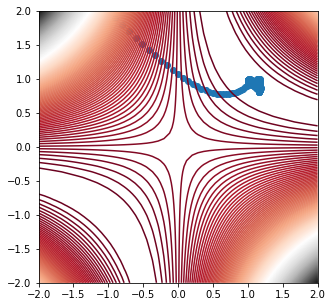

In [12]:
plt.figure(figsize=(5,5))

x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)

def f(x, y):
    return (x*y-1)**2

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
plt.contour(X, Y, Z, 200, cmap='RdGy')

parameters = np.array(parameters)
plt.scatter(params[:,0],params[:,1])
plt.xlim(-2,2)
plt.ylim(-2,2)

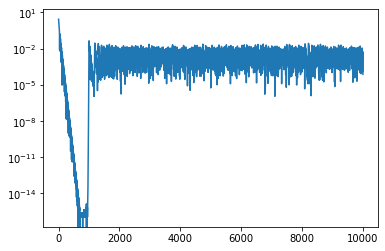

In [13]:
plt.plot(np.arange(epochs), np.sqrt(losses))
plt.yscale('log')

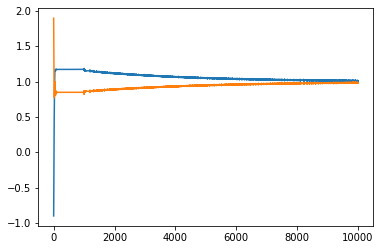

In [14]:
plt.plot(np.arange(epochs), params[:,0])
plt.plot(np.arange(epochs), params[:,1])

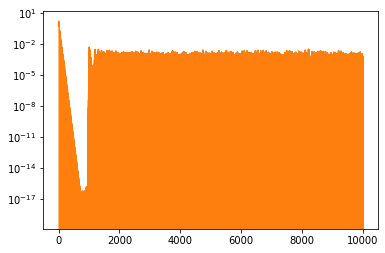

In [15]:
plt.plot(np.arange(epochs), ms)
#plt.plot(np.arange(epochs), vs)
plt.yscale('log')

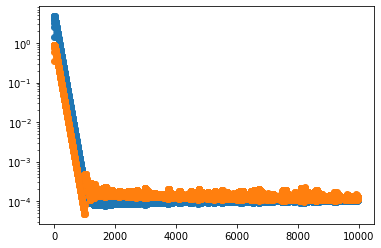

In [16]:
plt.plot(np.arange(epochs), vs, marker="o")
plt.yscale('log')

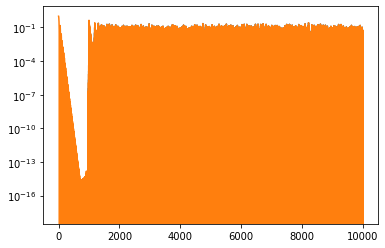

In [17]:
plt.plot(np.arange(epochs), eff_lr)
plt.yscale('log')

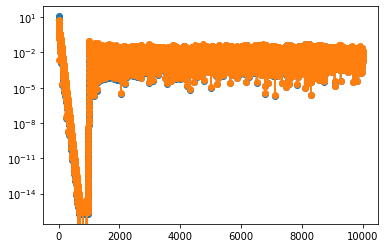

In [18]:
plt.plot(np.arange(epochs), np.sqrt(gs), marker="o")
plt.yscale('log')